In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Loading the dataset

In [67]:
# Loading our huge dataset of lego bricks that has 16 classes
data = tf.keras.utils.image_dataset_from_directory('data', image_size = (255, 255)) 

Found 6379 files belonging to 16 classes.


In [3]:
class_names = data.class_names

In [4]:
# Since the dataset isnt loaded to the memory entirely, it is fetched in batches using the numpy iterator
iterator = data.as_numpy_iterator()

In [5]:
batch = iterator.next()

In [6]:
# One is a matrix of the image pixels and the other is the labels associated with the picture
len(batch)

2

In [7]:
batch[1]

array([11, 10, 13,  0,  7,  6,  6, 12,  5,  0,  5, 13,  2, 11, 12,  9, 13,
       14, 15,  3, 10,  1,  2,  7,  1,  5,  9,  7,  1, 13, 12, 10],
      dtype=int32)

# Data Visualization

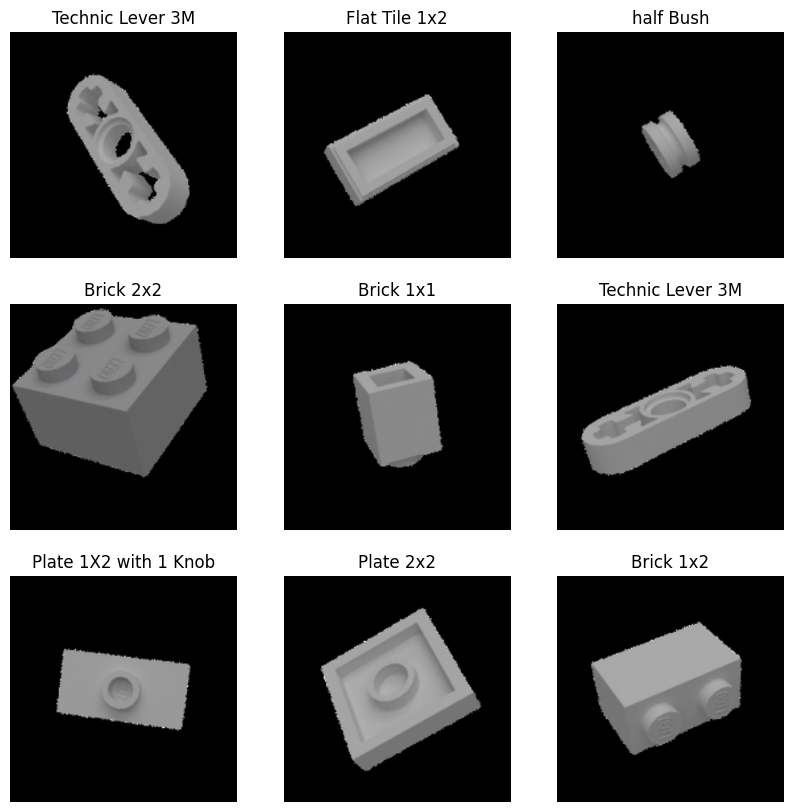

In [8]:
plt.figure(figsize=(10, 10))
for images, labels in data.take(1):  # Take one batch
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        # Use the label index to get the corresponding class name
        label_name = class_names[labels[i].numpy()]
        plt.title(f"{label_name}")
        
        plt.axis("off")
plt.show()

# Scaling the data

In [9]:
# we prefer to keep the range of the pixels between 0 to 1 for easier computation

data = data.map(lambda x, y: (x/255, y))

In [10]:
sc_batch = data.as_numpy_iterator().next()
sc_batch[0].max()

np.float32(0.95788324)

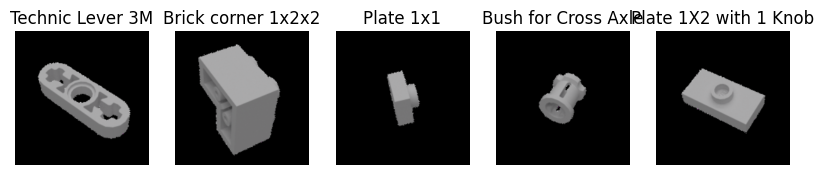

In [11]:
fig, ax = plt.subplots(ncols=5, figsize=(10, 10))

for idx, img in enumerate(sc_batch[0][:5]):
    ax[idx].imshow(img)
    
    label_name = class_names[sc_batch[1][idx]]
    ax[idx].title.set_text(label_name)
    
    ax[idx].axis('off')

plt.show()

# Split the data

In [12]:
len(data)

200

In [13]:
train_size = int(len(data) * .7)
val_size = int(len(data) * .2)
test_size = int(len(data) * .1)

In [14]:
train_size + val_size + test_size

200

In [15]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [16]:
len(train)

140

In [17]:
len(val)

40

# Neural Network Architecture

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout, RandomFlip, RandomZoom, RandomRotation, RandomContrast
from tensorflow.keras.regularizers import L2

In [19]:
#data_augmentation = Sequential([
 #   RandomFlip('horizontal_and_vertical'), 
  #  RandomZoom(0.2), 
   # RandomRotation(0.2), 
    #RandomContrast(0.2)
#])

In [21]:
model = Sequential([
    #data_augmentation,
    # First Convolutional Block
    Conv2D(64, (3, 3), activation='relu', input_shape=(255, 255, 3)),
    MaxPooling2D((2, 2)),

    # Second Convolutional Block
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Third Convolutional Block
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    #Fourth Convolutional Block
    Conv2D(512, (3, 3), activation = 'relu'),
    MaxPooling2D((2, 2)),
    # Flattening the output from the convolutional layers
    Flatten(),
    
    # Fully Connected Layers
    Dense(512, activation='relu'),  
    Dropout(0.5),
    
    Dense(256, activation = 'relu'),
    Dropout(0.5),
    
    Dense(16, activation='softmax')  # Output layer for 16 classes
])

C:\deeplearning\imagesuperres\superres\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 253, 253, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 126, 126, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 124, 124, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      51,380,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │           4,112 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,067,152 (202.44 MB)

 Trainable params: 53,067,152 (202.44 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import os

In [30]:
# Training step to get initial weights from the previous training
model.load_weights(os.path.join('models', 'complex.keras'))

In [31]:
model.compile(Adam(), loss = SparseCategoricalCrossentropy(), metrics = ['accuracy'])

# Model Training

In [32]:
logdir = 'logs'

In [33]:
tensorboard_callbacks = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [34]:
# Early Stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stopping  = EarlyStopping(
    monitor = 'val_loss',
    patience = 5,
    restore_best_weights = True
)

In [68]:
hist = model.fit(train,
          validation_data=val,
          epochs=50,
          callbacks=[early_stopping])

Epoch 1/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 320s 2s/step - accuracy: 0.9513 - loss: 0.1074 - val_accuracy: 0.9484 - val_loss: 0.1011
Epoch 2/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 361s 3s/step - accuracy: 0.9606 - loss: 0.0952 - val_accuracy: 0.9422 - val_loss: 0.1148
Epoch 3/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 362s 3s/step - accuracy: 0.9557 - loss: 0.1147 - val_accuracy: 0.9328 - val_loss: 0.1535
Epoch 4/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 359s 3s/step - accuracy: 0.9549 - loss: 0.0975 - val_accuracy: 0.9398 - val_loss: 0.1302
Epoch 5/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 365s 3s/step - accuracy: 0.9651 - loss: 0.0843 - val_accuracy: 0.9398 - val_loss: 0.1416


# Performance Evaulation

In [69]:
from tensorflow.keras.metrics import Accuracy, Precision, Recall

In [70]:
pre = Precision()
acc = Accuracy()
re = Recall()

In [71]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = tf.argmax(model.predict(X), axis =1)
    pre.update_state(y, yhat)
    acc.update_state(y, yhat)
    re.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 899ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 815ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 739ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 743ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 675ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 729ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 707ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 691ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 727ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 696ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 707ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 783ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step


In [72]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 1.0, Recall: 0.9982728958129883, Accuracy: 0.9434571862220764


# Performance Visualization

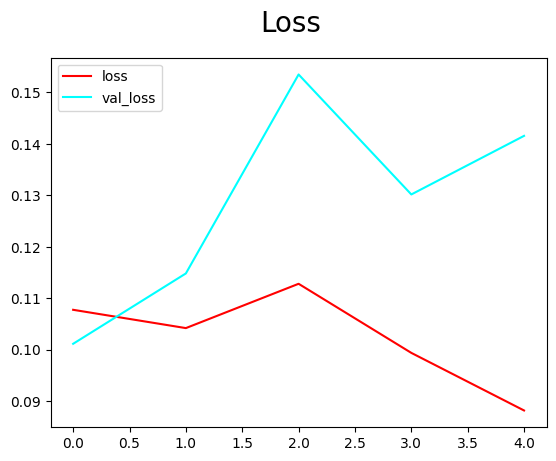

In [73]:
# LOSS

fig = plt.figure()
plt.plot(hist.history['loss'], color = 'red', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'cyan', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

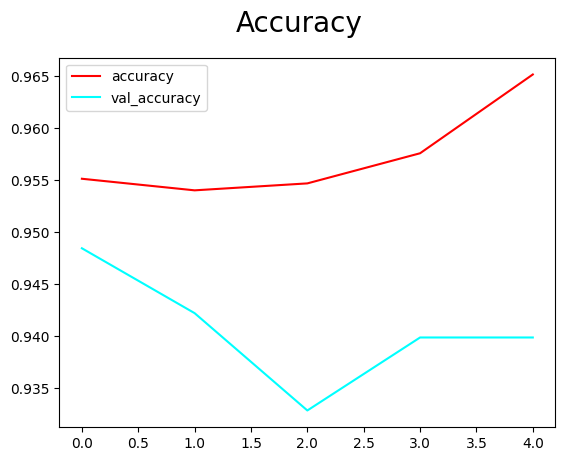

In [74]:
# ACCURACY

fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'red', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'cyan', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

# Saving the Model

In [75]:
from tensorflow.keras.models import load_model
import os

In [42]:
model.save(os.path.join('models', 'lego_95.keras'))

# Testing on singular images

In [76]:
import cv2
import numpy as np

In [77]:
# Getting personlized output instead of 0-16 values

# Labels

label_mapping = [
    'Brick 1x1',
    'Brick 1x2',
    'Brick 2x2',
    'Brick corner 1x2x2',
    'Bush 3M friction with Cross axle',
    'Bush for Cross Axle',
    'Cross Axle 2M with Snap friction',
    'Flat Tile 1x2',
    'Half Bush',
    'Peg 2M',
    'Plate 1x1',
    'Plate 1x2',
    'Plate 1x2 with 1 Knob',
    'Plate 2x2',
    'Roof Tile 1x2x45deg',
    'Technic Lever 3M'
]

def get_label(yhat):
    # Convert yhat to an integer, handling TensorFlow tensors or NumPy arrays
    if isinstance(yhat, tf.Tensor):
        yhat = int(yhat.numpy())   # Convert TensorFlow tensor to integer
    elif isinstance(yhat, np.ndarray):
        yhat = int(yhat.item())     # Convert NumPy array to integer

    if yhat < len(label_mapping):
        return label_mapping[yhat]
    else:
        return "Invalid Label"

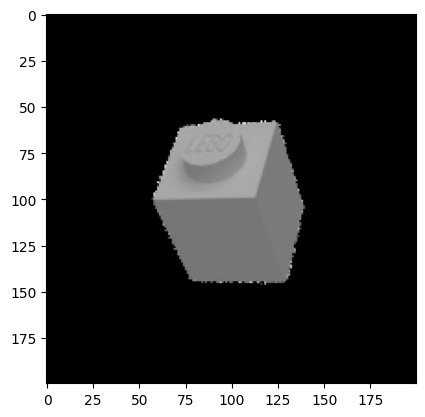

In [78]:
img = cv2.imread('test_1.png')
plt.imshow(img)
plt.show()

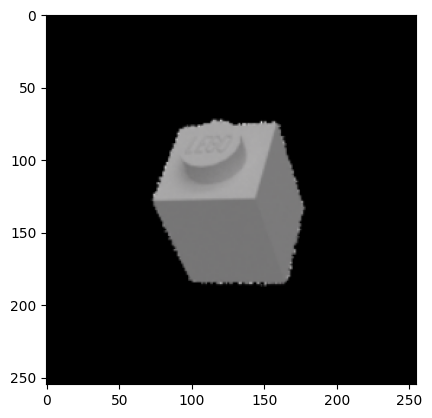

In [79]:
resize = tf.image.resize(img, (255, 255))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [80]:
yhat = tf.argmax(model.predict(np.expand_dims(resize/255, 0)), axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [81]:
get_label(yhat.numpy())

'Brick 1x1'

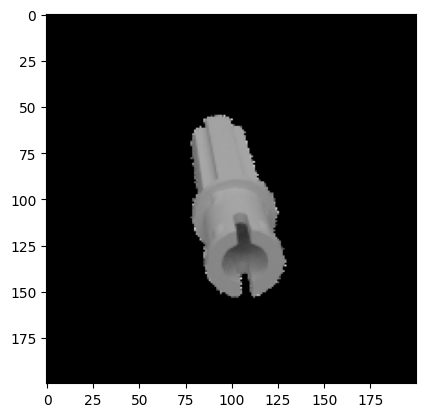

In [82]:
img_2 = cv2.imread('test_2.png')
plt.imshow(img_2)
plt.show()

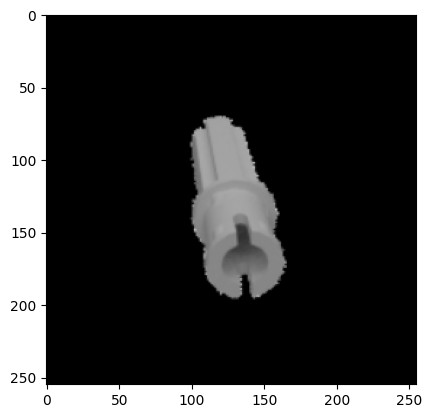

In [83]:
resize_2 = tf.image.resize(img_2, (255, 255))
plt.imshow(resize_2.numpy().astype(int))
plt.show()

In [84]:
yhat_2 = tf.argmax(model.predict(np.expand_dims(resize_2/255, 0)), axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [85]:
get_label(yhat_2.numpy())

'Cross Axle 2M with Snap friction'